In [2]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_excel("../ARV/data/out/arv.xlsx")

# Si Excel :

In [4]:
df

,ARV,DCI,ATC,n_meds,Med_1,DCI_Med1,ATC_Med1,Med_2,DCI_Med2,ATC_Med2,...,ATC_Med8,Med_9,DCI_Med9,ATC_Med9,Med_10,DCI_Med10,ATC_Med10,Med_11,DCI_Med11,ATC_Med11
0,Combivir + Kalétra,LAMIVUDINE; ZIDOVUDINE + LOPINAVIR; RITONAVIR,J05AR01 + J05AR10,2,COMBIVIR,LAMIVUDINE; ZIDOVUDINE,J05AR01,KALETRA,LOPINAVIR; RITONAVIR,J05AR10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Isentress + Truvada,RALTEGRAVIR + EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AJ01 + J05AR03,2,ISENTRESS,RALTEGRAVIR,J05AJ01,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Isentress + Kivexa,RALTEGRAVIR + ABACAVIR ; LAMIVUDINE,J05AJ01 + J05AR02,2,ISENTRESS,RALTEGRAVIR,J05AJ01,KIVEXA,ABACAVIR ; LAMIVUDINE,J05AR02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Triumeq,DOLUTEGRAVIR ; LAMIVUDINE; ABACAVIR,J05AR13,1,TRIUMEQ,DOLUTEGRAVIR ; LAMIVUDINE; ABACAVIR,J05AR13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Genvoya,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,J05AR18,1,GENVOYA,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,J05AR18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,Fuzeon + Trizivir + Viread + TMC 114,ENFUVIRTIDE + LAMIVUDINE; ABACAVIR; ZIDOVUDINE...,J05AX07 + NAN + J05AF07 + NAN,4,FUZEON,ENFUVIRTIDE,J05AX07,TRIZIVIR,LAMIVUDINE; ABACAVIR; ZIDOVUDINE,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19216,Norvir + Truvada + Ziagen + TMC 114 (Darunavir...,RITONAVIR + EMTRICITABINE; TENOFOVIR DISOPROXI...,J05AE03 + J05AR03 + J05AF06 + NAN + NAN,5,NORVIR,RITONAVIR,J05AE03,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19217,Norvir + Prezista + Truvada + Ziagen + TMC 125...,RITONAVIR + DARUNAVIR + EMTRICITABINE; TENOFOV...,J05AE03 + NAN + J05AR03 + J05AF06 + J05AG04,5,NORVIR,RITONAVIR,J05AE03,PREZISTA,DARUNAVIR,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19218,Norvir + Prezista + Truvada + Ziagen + Maravir...,RITONAVIR + DARUNAVIR + EMTRICITABINE; TENOFOV...,J05AE03 + NAN + J05AR03 + J05AF06 + NAN + J05AG04,6,NORVIR,RITONAVIR,J05AE03,PREZISTA,DARUNAVIR,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# liste dynamique de colonnes Med_X et DCI_MedX
med_cols = [col for col in df.columns if col.startswith("Med_")]
dci_cols = [col for col in df.columns if col.startswith("DCI_Med")]
atc_cols = [col for col in df.columns if col.startswith("ATC_Med")]

# format long pour Med
df_med = df[med_cols].melt(value_name='Med', var_name='col_med')

# format long pour DCI
df_dci = df[dci_cols].melt(value_name='DCI', var_name='col_dci')

# format long pour ATC
df_atc = df[atc_cols].melt(value_name='ATC', var_name='col_atc')

# fusion des positions pour aligner
df_long = pd.concat([df_med['Med'], df_dci['DCI'], df_atc['ATC']], axis=1)

# retirer les lignes vides
df_long = df_long.dropna(subset=['Med']).reset_index(drop=True)


In [6]:
df_introuvable = df_long[df_long['DCI'].str.contains("INTROUVABLE", na=False)]
df_introuvable

,Med,DCI,ATC
667,E/C/F TAF,INTROUVABLE (E/C/F TAF),NON_TROUVE
6497,E/C/F TAF,INTROUVABLE (E/C/F TAF),NON_TROUVE
6931,E/C/F TAF,INTROUVABLE (E/C/F TAF),NON_TROUVE
7014,VACCINOTHERAPIE,INTROUVABLE (VACCINOTHERAPIE),NON_TROUVE
8581,INTERFERON,INTROUVABLE (INTERFERON),NON_TROUVE
...,...,...,...
71785,VACCINOTHERAPIE,INTROUVABLE (VACCINOTHERAPIE),NON_TROUVE
73067,INTERFERON,INTROUVABLE (INTERFERON),NON_TROUVE
73503,VACCINOTHERAPIE,INTROUVABLE (VACCINOTHERAPIE),NON_TROUVE
74056,TAF (PRO TENOFOVIR ),INTROUVABLE (PRO TENOFOVIR),NON_TROUVE


In [7]:
# supprimer les Med vides ou NaN
df_long = df_long.dropna(subset=['Med'])

# supprimer les lignes où Med est une chaîne vide
df_long = df_long[df_long['Med'].str.strip() != ""]

# supprimer les doublons sur Med
df_long = df_long.drop_duplicates(subset=['Med'], keep='first')

# réindexer proprement
df_long = df_long.reset_index(drop=True)


In [8]:
df_long

,Med,DCI,ATC
0,COMBIVIR,LAMIVUDINE; ZIDOVUDINE,J05AR01
1,ISENTRESS,RALTEGRAVIR,J05AJ01
2,TRIUMEQ,DOLUTEGRAVIR ; LAMIVUDINE; ABACAVIR,J05AR13
3,GENVOYA,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,J05AR18
4,BIKTARVY,BICTEGRAVIR ; EMTRICITABINE; TENOFOVIR ALAFENA...,J05AR20
...,...,...,...
209,PRO AMPRENAVIR,FOSAMPRENAVIR,J05AE07
210,APRICITABINE,APRICITABINE,NAN
211,TROGARZO (IBALIZUMAB),IBALIZUMAB,J05AX23
212,HEPSERA,ADEFOVIR DIPIVOXIL,J05AF08


In [9]:
df=df_long

In [10]:
import pandas as pd
import numpy as np

def normalize_missing_values(df):
    # Étape 1 : remplacer None par NaN
    df = df.where(pd.notnull(df), np.nan)

    # Étape 2 : nettoyer les strings
    df = df.replace(
        [
            "", " ", "   ",
            "NaN", "nan", "NAN",
            "None", "none",
            "NULL", "null",
            "-", "?" , "NON_TROUVE","INTROUVABLE"
        ],
        np.nan
    )

    # Étape 3 : strip des colonnes texte
    for col in df.select_dtypes(include="object"):
        df[col] = df[col].str.strip()

    return df
df = normalize_missing_values(df)


In [11]:
# Supprimer les lignes avec valeurs manquantes
df = df.dropna(subset=['ATC', 'DCI', 'Med'])


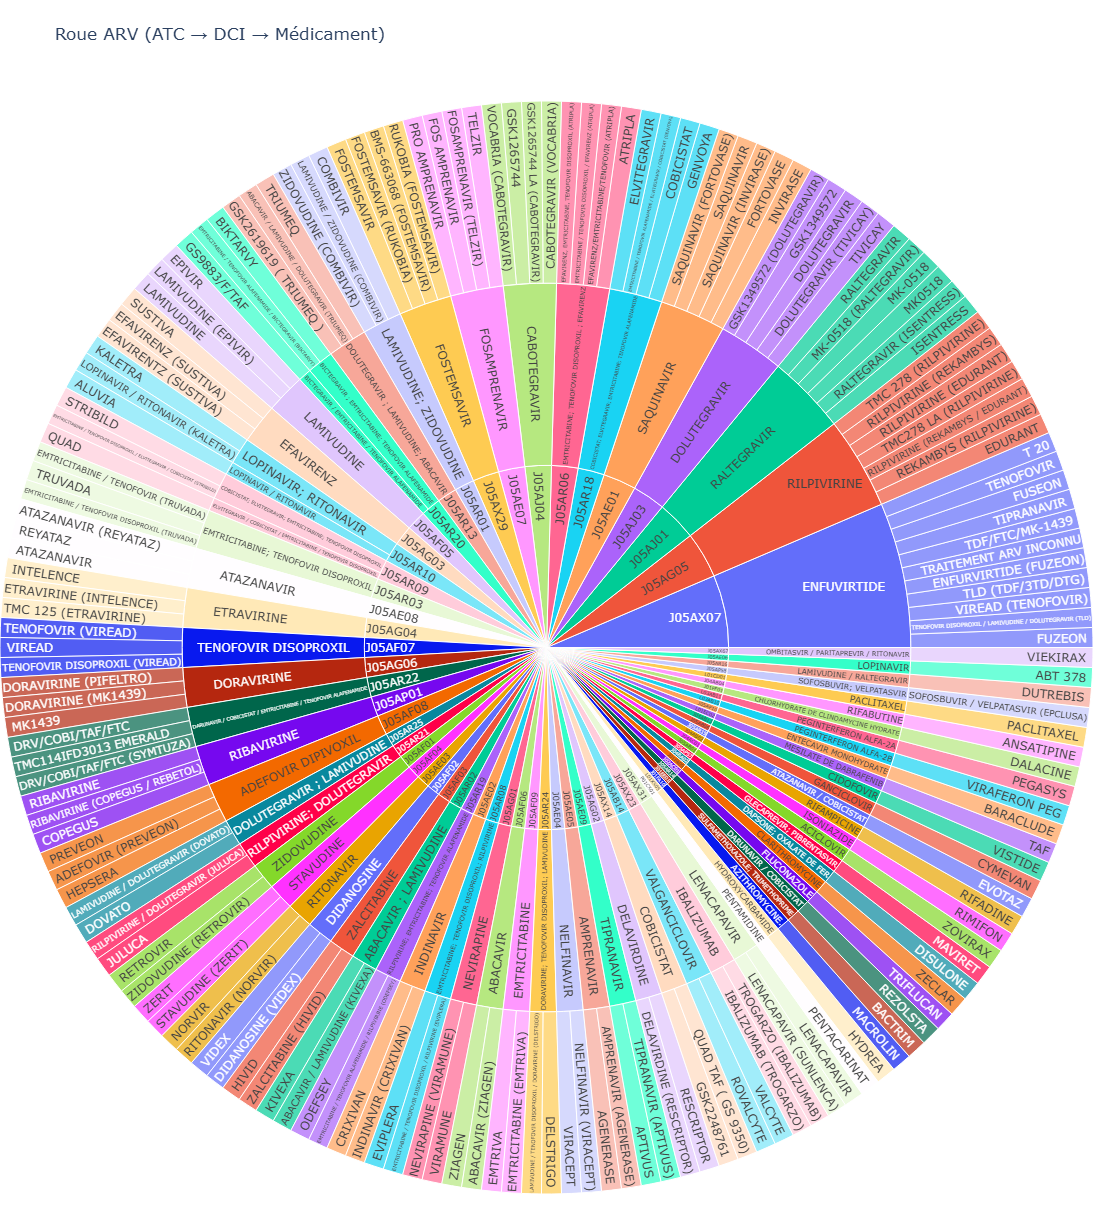

In [12]:
df['ATC'] = df['ATC'].str.strip()
df['DCI'] = df['DCI'].str.strip()
df['Med'] = df['Med'].str.strip()

# Supprimer les doublons
df_unique = df.drop_duplicates()


fig = px.sunburst(
    df_unique,
    path=['ATC', 'DCI', 'Med'],
    title="Roue ARV (ATC → DCI → Médicament)"
)

fig.update_layout(
    width=1200,
    height=1200,
    margin=dict(t=80, l=0, r=0, b=0)
)



fig.show()


In [13]:
fig.write_html("roue_ARV_interactive.html")
